In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm_notebook
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12


In [2]:
data_set=pd.read_csv('Z:\Python Share\Input Files - Jenine\ScheduledSessions5YearsTill20240630.csv')
    

In [3]:
data_set.head(30)


,TheFirstOfWeek,Location_Key,StudentType,SessionCount
0,6/30/2019,1,CFC,91.0
1,6/30/2019,1,FT,61.0
2,6/30/2019,1,TM,20.0
3,6/30/2019,2,CFC,70.0
4,6/30/2019,2,FT,16.0
5,6/30/2019,2,TM,12.0
6,6/30/2019,3,CFC,109.0
7,6/30/2019,3,FT,164.0
8,6/30/2019,3,TM,31.0
9,6/30/2019,4,CFC,45.0


In [22]:
data_filtered.reset_index(inplace=True)
data_filtered['TheFirstOfWeek'] = pd.to_datetime(data_filtered['TheFirstOfWeek'])
#data_filtered=data_set[(data_set['Location_Key']== 61)&(data_set['StudentType']=='FT')]

In [23]:
data_filtered

,index,TheFirstOfWeek,Location_Key,StudentType,SessionCount
0,0,2020-01-26,61,FT,24.0
1,1,2020-02-02,61,FT,41.0
2,2,2020-02-09,61,FT,54.0
3,3,2020-02-16,61,FT,40.0
4,4,2020-02-23,61,FT,62.0
...,...,...,...,...,...
210,210,2024-05-26,61,FT,317.0
211,211,2024-06-02,61,FT,400.0
212,212,2024-06-09,61,FT,256.0
213,213,2024-06-16,61,FT,62.0


In [25]:
data_filtered.drop(columns=['Location_Key', 'StudentType'],inplace=True)


In [8]:
#data_filtered.drop(columns=['Location_Key', 'StudentType'], inplace=True)

In [36]:
#data_filtered.set_index("TheFirstOfWeek", inplace=True)
data_filtered.drop(columns=['index'], inplace=True)

In [34]:
#data_filtered['TheFirstOfWeek'] = pd.to_datetime(data_filtered['TheFirstOfWeek'])


TypeError: DataFrame.drop() got an unexpected keyword argument 'column'

In [1]:
mod = sm.tsa.statespace.SARIMAX(data_filtered,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 49),
                                enforce_invertibility=False,
                                enforce_stationarity=False)
                             

results = mod.fit(disp=False)
print(results.summary().tables[1])

NameError: name 'sm' is not defined

In [73]:
actual_data=pd.read_excel('ScheduledSessionsActualsFY25.xlsx')
actual_data.to_csv('output.csv', index=False)

In [42]:
actual_output=pd.read_csv('Actualsoutput.csv')
actual_output['TheFirstOfWeek'] = pd.to_datetime(actual_output['TheFirstOfWeek'])

In [49]:
filtered_Actuals_output=actual_output[(actual_output['AppointmentLocation_Key']== 61)&(actual_output['StudentType']=='FT')]

In [50]:
filtered_Actuals_output.drop(columns=['AppointmentLocation_Key','StudentType'], inplace=True)

In [51]:
filtered_Actuals_output.set_index("TheFirstOfWeek", inplace=True)

In [ ]:
forecast_steps=80
forecast=results.get_forecast(steps=forecast_steps)
forecast_index=pd.date_range(start=data_filtered.index[-1], periods=forecast_steps +1, freq='W')[1:]
forecast_values=forecast.predicted_mean

In [ ]:
 #Ensure the index is in datetime format
filtered_Actuals_output.index = pd.to_datetime(filtered_Actuals_output.index, format='%Y-%m-%d')

# Get forecast for the same period as the actuals
forecast_df = results.get_forecast(steps=len(filtered_Actuals_output)).predicted_mean
forecast_df = pd.DataFrame(forecast_df, columns=["forecast"])
forecast_df.index = filtered_Actuals_output.index  # Align forecast dates with actual dates

# Plot actuals
plt.figure(figsize=(14, 6))
plt.plot(filtered_Actuals_output.index, filtered_Actuals_output['SessionCount'], label="Actual", color="blue")

# Plot forecast
plt.plot(forecast_df.index, forecast_df['forecast'], label="Forecast", linestyle="dashed", color="red")

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show a tick every 5 days
plt.xticks(rotation=45)  
plt.show()

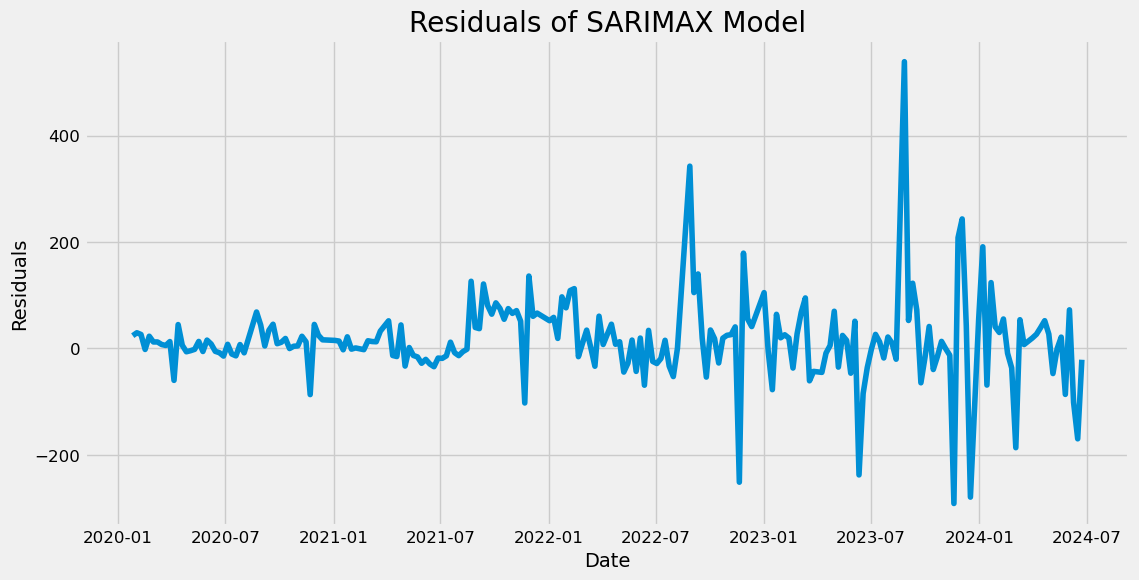

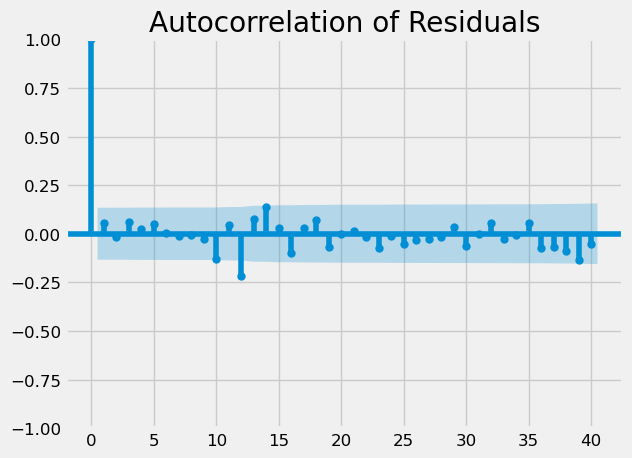

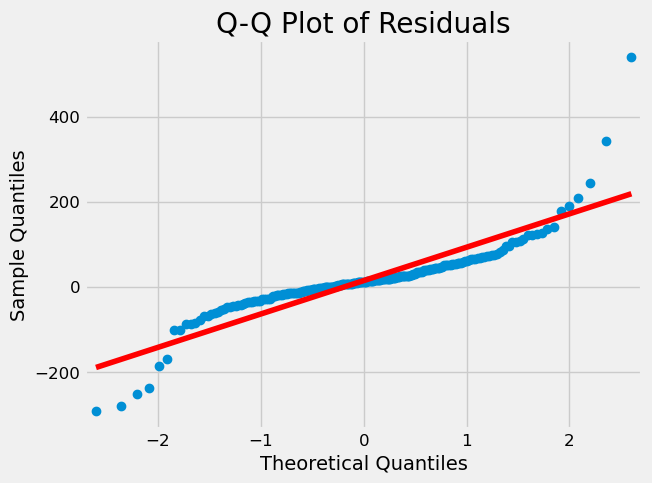

In [38]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Extract residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()

# Check for normality (Q-Q plot)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:



# Assuming 'steps' is the number of forecast steps and 'start_date' is the last date in your observed data
start_date = filtered_Actuals_output.index[-1]
date_range = pd.date_range(start=start_date, periods=steps, freq='D')  

# Assign the date range to the forecast output
pred_uc.predicted_mean.index = date_range
pred_ci.index = date_range
pred_uc = results.get_forecast(steps=steps)  # Corrected the syntax for 'steps'
pred_ci = pred_uc.conf_int(alpha=0.01)  # Corrected the syntax for confidence interval

# Plotting the observed data
ax = filtered_Actuals_output.plot(label='observed', figsize=(18,5))

# Plotting the forecasted mean
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# Filling the confidence interval
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],  # Corrected the syntax for accessing the lower bound
                pred_ci.iloc[:, 1],  # Corrected the syntax for accessing the upper bound
                color='k', alpha=.25)

# Setting labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')  # Corrected the method name to 'set_ylabel'
plt.legend()  # Corrected the method name to 'legend'

# Display the plot
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2024-06-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = filtered_Actuals_output.loc['2025'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(10, 2))
#ax.fill_between(pred_ci.index,
              # pred_ci.iloc[:, 0],
              #pred_ci.iloc[:, 1]) #, color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.show()

In [39]:
data_filtered



,SessionCount
TheFirstOfWeek,
2020-01-26,24.0
2020-02-02,41.0
2020-02-09,54.0
2020-02-16,40.0
2020-02-23,62.0
...,...
2024-05-26,317.0
2024-06-02,400.0
2024-06-09,256.0


In [58]:
import matplotlib.pyplot as plt

# Generate forecast with weekly frequency
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int(0.01)

# Extract observed data for 2025 and ensure it has a weekly frequency
observed_2025 = filtered_Actuals_output.loc['2025'].asfreq('W')

start_date = observed_2025.index[-1] + pd.DateOffset(weeks=1)  
forecast_index = pd.date_range(start='2024-06-23', periods=52, freq='W')


# Ensure forecast index has weekly frequency
forecast_index = pd.date_range(start=observed_2025.index[-1], periods=52, freq='W')
pred_uc.predicted_mean.index = forecast_index
pred_ci.index = forecast_index

# Plot observed data for 2025
ax = observed_2025.plot(label='Observed', figsize=(14, 4))

# Plot forecast data
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.6)

# Add confidence interval
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.title('52 Weeks Forecast for 2025')
plt.show()


TypeError: index type not supported

In [ ]:
results

In [63]:


# Forecast for 52 weeks in 2025
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int(0.01)
forecast_start=pd.to_datetime('2024-06-23')
forecast_index=pd.date_range(start=forecast_start, periods=len(pred_uc.predicted_mean), freq='W')
pred_uc.predicted_mean.index=forecast_index
pred_ci.index=forecast_index

# Extract observed data for 2025 from filtered_actuals_output
observed_2025 = filtered_Actuals_output.loc['2025']

# Plot observed data for 2025
ax = observed_2025.plot(label='Observed', figsize=(14, 4))

# Plot forecast data
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=.06)


# Add confidence interval
#ax.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.title('52 Weeks Forecast for 2025')
plt.show()

TypeError: index type not supported

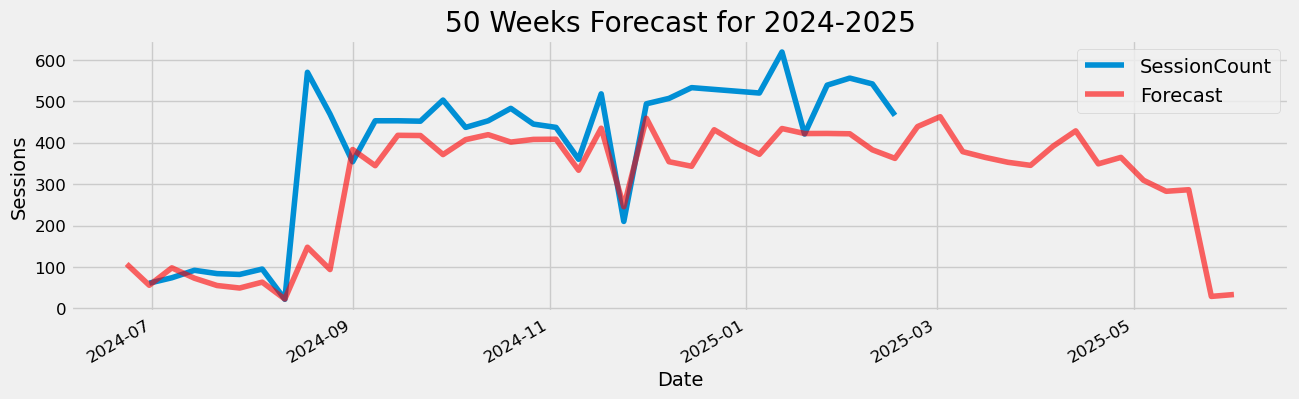

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecast for 50 weeks in 2025
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int(0.01)

# Ensure forecasted values have a proper DatetimeIndex
forecast_start = pd.to_datetime('2024-06-23')  # Adjust based on your dataset
forecast_index = pd.date_range(start=forecast_start, periods=len(pred_uc.predicted_mean), freq='W')

# Assign the new index explicitly
pred_uc_mean = pred_uc.predicted_mean.copy()  # Copy to avoid modifying the original object
pred_uc_mean.index = forecast_index
pred_ci = pred_ci.set_index(forecast_index)  # Ensure confidence interval index matches

# Extract observed data for 2025
filtered_Actuals_output.index = pd.to_datetime(filtered_Actuals_output.index)  # Ensure it's a DatetimeIndex
observed_2025 = filtered_Actuals_output

# Plot observed data
ax = observed_2025.plot(label='Observed', figsize=(14, 4))

# Plot forecast data
pred_uc_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.6)

# Add confidence interval
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.title('50 Weeks Forecast for 2024-2025')
plt.show()


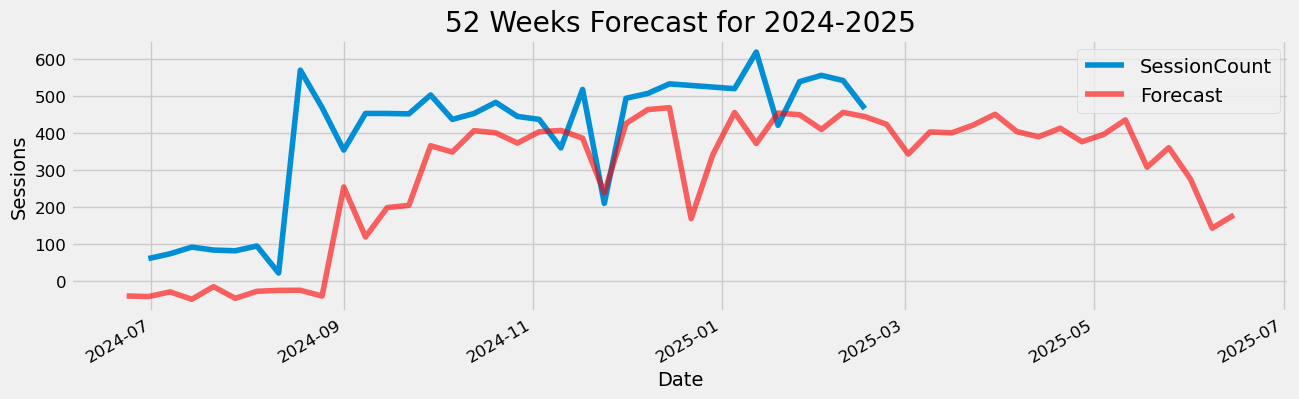

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecast for 52 weeks in 2025
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int(0.01)

# Ensure forecasted values have a proper DatetimeIndex
forecast_start = pd.to_datetime('2024-06-23')  # Adjust based on your dataset
forecast_index = pd.date_range(start=forecast_start, periods=len(pred_uc.predicted_mean), freq='W')

# Assign the new index explicitly
pred_uc_mean = pred_uc.predicted_mean.copy()  # Copy to avoid modifying the original object
pred_uc_mean.index = forecast_index
pred_ci = pred_ci.set_index(forecast_index)  # Ensure confidence interval index matches

# Extract observed data for 2025
filtered_Actuals_output.index = pd.to_datetime(filtered_Actuals_output.index)  # Ensure it's a DatetimeIndex
observed_2025 = filtered_Actuals_output

# Plot observed data
ax = observed_2025.plot(label='Observed', figsize=(14, 4))

# Plot forecast data
pred_uc_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.6)

# Add confidence interval
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.title('52 Weeks Forecast for 2024-2025')
plt.show()


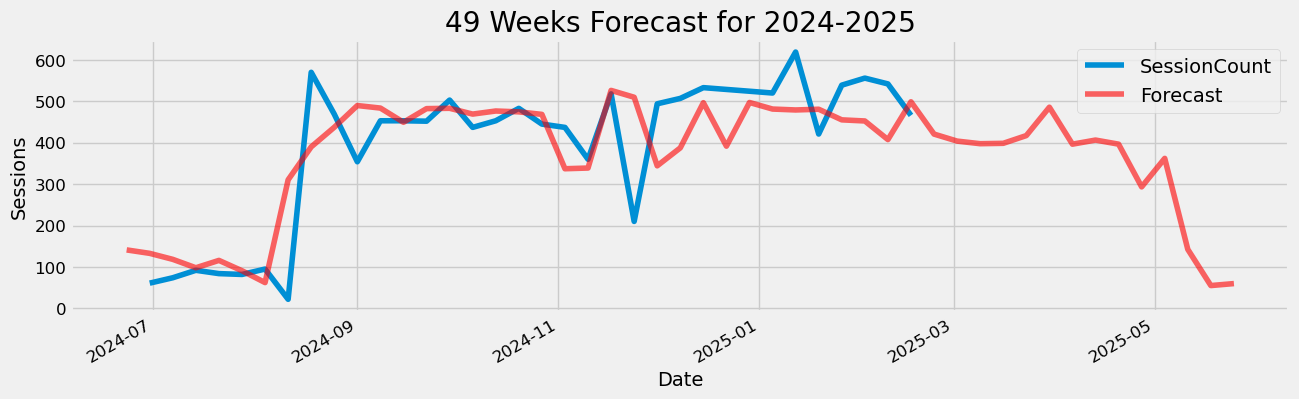

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecast for 49 weeks in 2025
pred_uc = results.get_forecast(steps=49)
pred_ci = pred_uc.conf_int(0.01)

# Ensure forecasted values have a proper DatetimeIndex
forecast_start = pd.to_datetime('2024-06-23')  # Adjust based on your dataset
forecast_index = pd.date_range(start=forecast_start, periods=len(pred_uc.predicted_mean), freq='W')

# Assign the new index explicitly
pred_uc_mean = pred_uc.predicted_mean.copy()  # Copy to avoid modifying the original object
pred_uc_mean.index = forecast_index
pred_ci = pred_ci.set_index(forecast_index)  # Ensure confidence interval index matches

# Extract observed data for 2025
filtered_Actuals_output.index = pd.to_datetime(filtered_Actuals_output.index)  # Ensure it's a DatetimeIndex
observed_2025 = filtered_Actuals_output

# Plot observed data
ax = observed_2025.plot(label='Observed', figsize=(14, 4))

# Plot forecast data
pred_uc_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.6)

# Add confidence interval
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
plt.legend()
plt.title('49 Weeks Forecast for 2024-2025')
plt.show()


,SessionCount
TheFirstOfWeek,
2024-04-21,458.0
2024-04-28,521.0
2024-05-05,457.0
2024-05-12,457.0
2024-05-19,463.0
2024-05-26,317.0
2024-06-02,400.0
2024-06-09,256.0
2024-06-16,62.0
